In [2]:
from astropy.table import QTable
import matplotlib.pyplot as plt
import numpy as np

In [3]:
SN_Table = QTable.read('sn_coord_host_table_vflag.txt', format= 'ascii.ecsv')

(array([1842.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         216.,  232.,  255.]),
 array([-9.5, -8.5, -7.5, -6.5, -5.5, -4.5, -3.5, -2.5, -1.5, -0.5,  0.5,
         1.5,  2.5]),
 <a list of 12 Patch objects>)

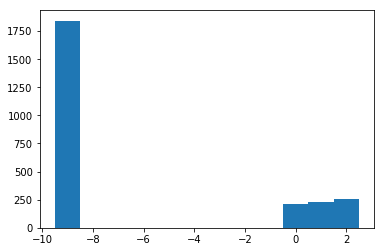

In [4]:
plt.figure()
plt.hist(SN_Table['vflag'], bins=np.linspace(-9.5,2.5,13))

In [5]:
# Stripe 82 cuts: 
ra_array_cut = np.logical_or(SN_Table['NSA_RA'] < 60., SN_Table['NSA_RA'] > 300.)
dec_array_cut = np.logical_and(SN_Table['NSA_DEC'] > -1.26, SN_Table['NSA_DEC'] < 1.26)
stripe82_cut = np.logical_and(ra_array_cut, dec_array_cut)

SN_82 = SN_Table[stripe82_cut]
SN_not82 = SN_Table[~stripe82_cut]

(array([1243.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         216.,  232.,  255.]),
 array([-9.5, -8.5, -7.5, -6.5, -5.5, -4.5, -3.5, -2.5, -1.5, -0.5,  0.5,
         1.5,  2.5]),
 <a list of 12 Patch objects>)

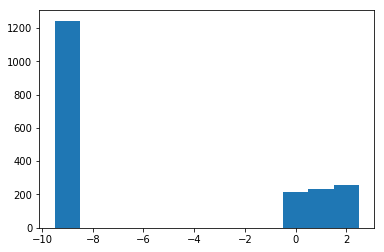

In [6]:
plt.figure()
plt.hist(SN_not82['vflag'], bins=np.linspace(-9.5,2.5,13))

(array([599.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.]),
 array([-9.5, -8.5, -7.5, -6.5, -5.5, -4.5, -3.5, -2.5, -1.5, -0.5,  0.5,
         1.5,  2.5]),
 <a list of 12 Patch objects>)

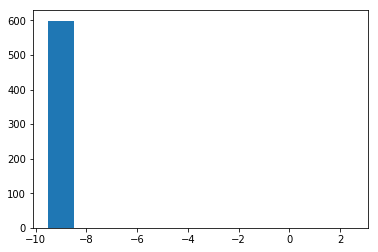

In [7]:
plt.figure()
plt.hist(SN_82['vflag'], bins=np.linspace(-9.5,2.5,13))

Total objects outside of environment: 1842.
Number of objects in Stripe 82: 599.
Wall: 216, Void: 232, Edge: 255


[Text(0.5, 1.0, 'Stripe 82')]

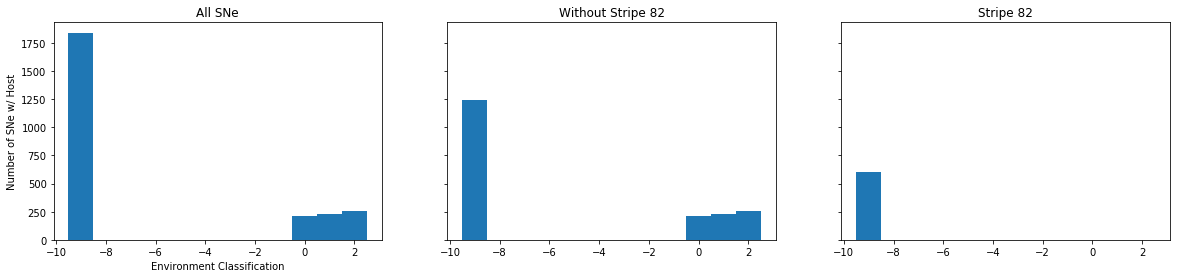

In [8]:
print('Total objects outside of environment: 1842.') 
print('Number of objects in Stripe 82: 599.')
print('Wall: 216, Void: 232, Edge: 255')

fig, ax = plt.subplots(1, 3, figsize=(20, 4), sharex= True, sharey= True)

ax1 = ax[0]
ax1.hist(SN_Table['vflag'], bins=np.linspace(-9.5,2.5,13))
ax1.set(xlabel='Environment Classification',
        ylabel='Number of SNe w/ Host',
        title= 'All SNe')

ax2 = ax[1]
ax2.hist(SN_not82['vflag'], bins=np.linspace(-9.5,2.5,13))
ax2.set(title='Without Stripe 82')

ax3 = ax[2]
ax3.hist(SN_82['vflag'], bins=np.linspace(-9.5,2.5,13))
ax3.set(title='Stripe 82')


In [17]:
# Create an array of booleans to match the SNe "outside" the void survey.
novoid = SN_not82['vflag'] == -9

# Use the "novoid" boolean array to select a subset of RA, Dec, z with no void associated.
ra_novoid = SN_not82['NSA_RA'][novoid]
dec_novoid = SN_not82['NSA_DEC'][novoid]
z_novoid = SN_not82['NSA_REDSHIFT'][novoid]

# Plot

## SNe Positions Outside the DR7 Void Fiducial Volume

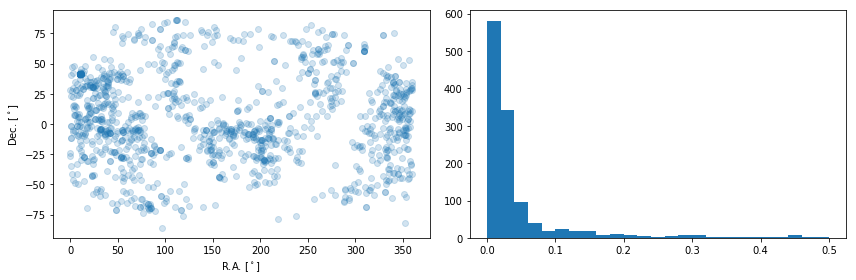

In [37]:
fig, ax = plt.subplots(1, 2, figsize = (12, 4))

ax1 = ax[0]
ax1.plot(ra_novoid, dec_novoid, 'o', alpha = 0.2)
ax1.set(xlabel=r'R.A. [$^\circ$]',
        ylabel=r'Dec. [$^\circ$]',
        title  = '')

ax2 = ax[1]
ax2.hist(z_novoid, bins=np.linspace(0, 0.5, 26))

fig.tight_layout()

## All RA, Dec, Redshift

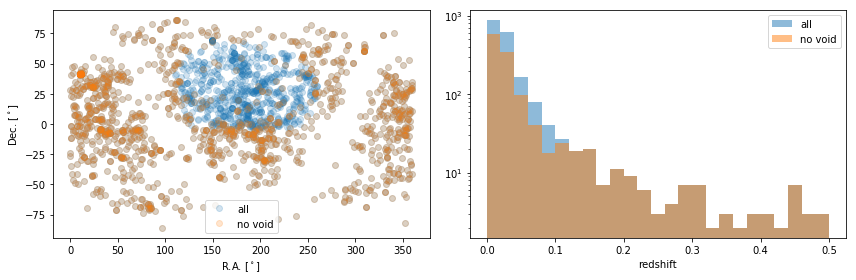

In [38]:
fig, ax = plt.subplots(1, 2, figsize = (12, 4))

ra_all = SN_not82['NSA_RA']
dec_all = SN_not82['NSA_DEC']
z_all = SN_not82['NSA_REDSHIFT']

ax1 = ax[0]
ax1.plot(ra_all, dec_all, 'o', alpha = 0.2, label='all')
ax1.plot(ra_novoid, dec_novoid, 'o', alpha=0.2, label='no void')
ax1.set(xlabel=r'R.A. [$^\circ$]',
        ylabel=r'Dec. [$^\circ$]',
        title  = '')
ax1.legend()

ax2 = ax[1]
ax2.hist(z_all, bins=np.linspace(0, 0.5, 26), alpha=0.5, label='all')
ax2.hist(z_novoid, bins=np.linspace(0, 0.5, 26), alpha=0.5, label='no void')
ax2.set(yscale='log',
        xlabel='redshift')
ax2.legend()

fig.tight_layout()